#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords


from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D
from wordcloud import WordCloud



## TEXT PRE-PROCESSING FOR NLP

In [8]:
df=pd.read_csv("new_dataset.csv")

In [9]:
# df.head()

In [10]:
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
def preprocess(text):
    text = re.sub(r'@\w+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    tokens = [t for t in tokens if t not in stop_words]

    return ' '.join(tokens)

df['text']= df['text'].apply(preprocess)
df.head()

,sentiment,text
0,Negative,oh u order horribl
1,Negative,great hard train weekend coupl day rest let lo...
2,Negative,right work onli hour go im free xd
3,Negative,crave japanes food
4,Negative,jean michel jarr concert tomorrow got ta work ...


In [12]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def stem_text(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(t) for t in tokens]
    return ' '.join(stemmed)

df['text'] = df['text'].apply(stem_text)
df.head()

,sentiment,text
0,Negative,oh u order that horribl
1,Negative,a great hard train weekend coupl day rest let ...
2,Negative,right work onli hour go im free xd
3,Negative,i crave japanes food
4,Negative,jean michel jarr concert tomorrow got ta work ...


In [13]:
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['text'])
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

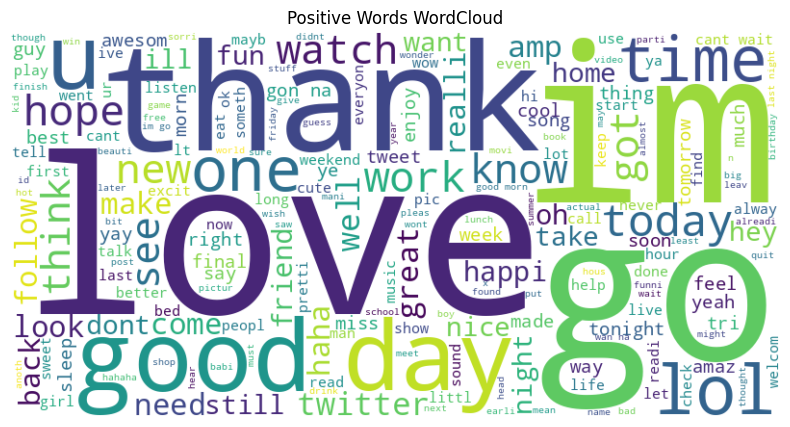

In [14]:
# Plot Positive wordcloud
plt.figure(figsize=(10,5))
plt.title('Positive Words WordCloud')
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

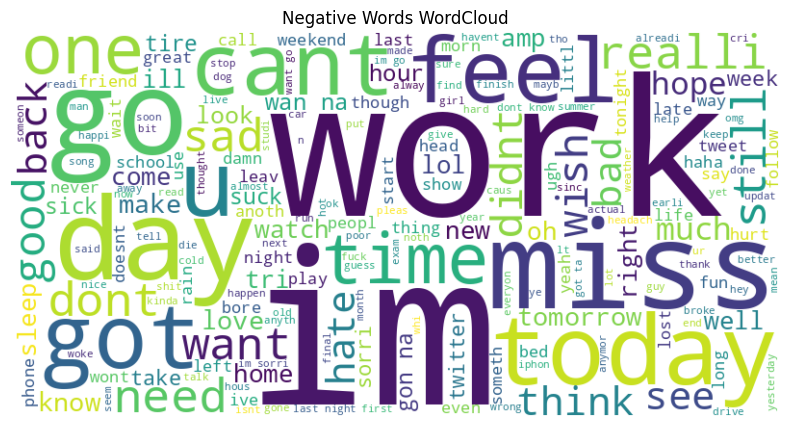

In [15]:
# Plot Negative wordcloud
plt.figure(figsize=(10,5))
plt.title('Negative Words WordCloud')
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
X= df['text']
y= df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, oov_token=None)
# Fitting tokenizer
tokenizer.fit_on_texts(X_train)
# converting texts to sequences
sequences = tokenizer.texts_to_sequences(X_train)
# checking vocab size
vocab_size = len(tokenizer.word_index) + 1

print(f"Vocabulary Size: {vocab_size}")


Vocabulary Size: 11478


In [20]:
word_index = tokenizer.word_index

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test.tolist())

In [22]:
print(X_train_sequences[1])
print(X_test_sequences[1])

[71, 1378, 33, 4163, 75, 1379, 68, 66, 4164, 392]
[32, 86, 739, 288, 2389, 2228, 558, 267, 415]


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 36
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='pre')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='pre')

In [24]:
print("Training Data:\n",X_train_padded[1])
print("Testing Data:\n",X_test_padded[1])


Training Data:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   71 1378
   33 4163   75 1379   68   66 4164  392]
Testing Data:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   32
   86  739  288 2389 2228  558  267  415]


In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit label encoder
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.transform(y_test)

In [26]:
print("Encoded training labels:", y_train_encoded)
print("Testing labels:", y_test_encoded)

Encoded training labels: [0 0 0 ... 1 0 1]
Testing labels: [1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

In [27]:
!wget --no-check-certificate https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip


--2025-06-18 18:46:00--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2025-06-18 18:48:39 (5.19 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [28]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
MAX_SEQUENCE_LENGTH = 36
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)


Found 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

In [29]:
MAX_SEQUENCE_LENGTH = 36
EMBEDDING_DIM = 100
VOCAB_SIZE = vocab_size

In [30]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(16, kernel_size=3, activation='relu')(x)
x = Bidirectional(LSTM(16))(x)
x = Dropout(0.3)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=sequence_input, outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 36, 300)        │     3,443,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 36, 300)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 34, 16)         │        14,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,462,585 (13.21 MB)

 Trainable params: 19,185 (74.94 KB)

 Non-trainable params: 3,443,400 (13.14 MB)

In [31]:
# Train the model
history=model.fit(X_train_padded, y_train_encoded, batch_size=32, epochs=10,validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.5447 - loss: 0.6803 - val_accuracy: 0.6678 - val_loss: 0.6054
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6859 - loss: 0.6020 - val_accuracy: 0.6900 - val_loss: 0.5811
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7077 - loss: 0.5763 - val_accuracy: 0.6933 - val_loss: 0.5786
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7092 - loss: 0.5698 - val_accuracy: 0.6983 - val_loss: 0.5693
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7418 - loss: 0.5337 - val_accuracy: 0.6989 - val_loss: 0.5728
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7622 - loss: 0.5053 - val_accuracy: 0.6944 - val_loss: 0.5712
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7738 - loss: 0.4940 - val_accuracy: 0.6967 - val_loss: 0.5704
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7909 - loss: 0.4601 - val_a

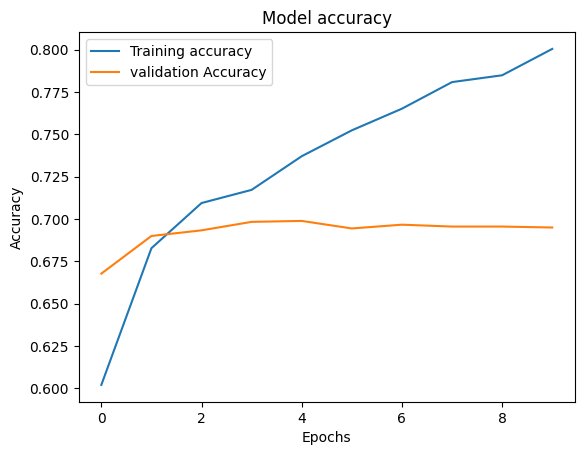

In [32]:
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


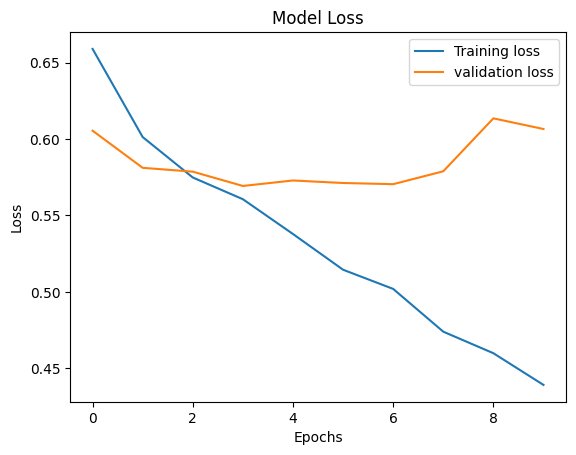

In [33]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [34]:
results = model.evaluate(X_test_padded,y_test_encoded)
print("Loss = ",results[0])
print("Accuracy = ",results[1],"%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6844 - loss: 0.6134
Loss =  0.6035934686660767
Accuracy =  68.69999766349792 %


In [35]:
import random
random_index = random.randint(0, len(X_test_padded) - 1)
random_sequence_padded = X_test_padded[random_index]
original_text = X_test.iloc[random_index]
random_sequence_padded_input = np.expand_dims(random_sequence_padded, axis=0)
prediction = model.predict(random_sequence_padded_input)
predicted_sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


In [36]:
print(f"Original Text: {original_text}")
print(f"Predicted Sentiment: {predicted_sentiment}")
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

Original Text: ah okso your tweet move yet lol what work on saturday
Predicted Sentiment: Negative


In [37]:
def decode_sequence(sequence):
  decoded_words = [reverse_word_index.get(i, '?') for i in sequence if i != 0]
  return ' '.join(decoded_words)

decoded_string = decode_sequence(random_sequence_padded)
print(f"Decoded String (from padded sequence): {decoded_string}")

In [39]:
input_str='I hate everyone on earth!'
seq = tokenizer.texts_to_sequences([input_str])
padded_input = pad_sequences(seq, maxlen=100, padding='post')
pred = model.predict(padded_input)
predicted_sentiment = "Positive" if pred[0][0] > 0.5 else "Negative"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


In [40]:
print(f"Original Text: {input_str}")
print(f"Predicted Sentiment: {predicted_sentiment}")
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

Original Text: I hate everyone on earth!
Predicted Sentiment: Negative


## GOOD JOB!